# Project: Investigate a Dataset - [TMDb Movies Data - (Kaggle)]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), the dataset contains a lot of columns that contains information about the movies, in this report we are going to explore more about the following columns.
>
> Movies Title: Contain the name of the movie.
>
> Director: Contain the name of the movie director.
>
> Vote Average: Contain the average vote for the movie.
>
> Release Year: Contain the year of release for the movie.
>
> Budget: Contain the budget of the movie.
>
> Revenue: Contain the revenue of the movie.

### Question(s) for Analysis
>Q-1: Is there any relation between the released year and the budget, the revenue, number of released movies?
>
>Q-2: Is there any relation between the revenue and vote average / budget ?
>

In [1]:
#Importing The packages that going to be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#magic word
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, We are goint to perform Data Wrangling in three steps  as follows:
>
> 1-Gether the data
>
> 2-Assess the data
>
> 3-Cleaning the data

> ### Data Gethering 

In [2]:
# Loading the data file, checking the shape of the data and show first 5 rows of the data
df_tmdp_movies = pd.read_csv('tmdb-movies.csv')
print(df_tmdp_movies.shape)
df_tmdp_movies.head()

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> ### Data Assessing 

In [3]:
# Checking the missing values
df_tmdp_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
# Checking the data types
df_tmdp_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# Checking the duplicate in dataset 
df_tmdp_movies.duplicated().sum()

1

In [6]:
# Checking if there is any zero values in columns of "budget & Revenue"
missing_values_budget = (df_tmdp_movies['budget_adj'] == 0).sum()
missing_values_revnue = (df_tmdp_movies['revenue_adj'] == 0).sum()
print ("There are missing vales of budget for {} movies and missing values of revenue for {} movie".format(missing_values_budget, missing_values_revnue))

#There is a lot of missing values, I am going to perform some analysis on count of movies so I will keep all rows of missing values from budget and revenue

There are missing vales of budget for 5696 movies and missing values of revenue for 6016 movie


> #  Data Cleaning

In [7]:
#Selecting the columns that will be used in data analysis
df_tmdp_movies_clean = df_tmdp_movies.iloc[:,np.r_[5,8,17,18:21]]

#Change the name of some columns
df_tmdp_movies_clean = df_tmdp_movies_clean.rename(columns={'original_title':'movies_title','revenue_adj':'revenue','budget_adj':'budget'})

#Change column data type from float to int
df_tmdp_movies_clean['revenue'] = df_tmdp_movies_clean['revenue'].astype('int64')
df_tmdp_movies_clean['budget'] = df_tmdp_movies_clean['budget'].astype('int64')

df_tmdp_movies_clean.head()

,movies_title,director,vote_average,release_year,budget,revenue
0,Jurassic World,Colin Trevorrow,6.5,2015,137999939,1392445892
1,Mad Max: Fury Road,George Miller,7.1,2015,137999939,348161292
2,Insurgent,Robert Schwentke,6.3,2015,101199955,271619025
3,Star Wars: The Force Awakens,J.J. Abrams,7.5,2015,183999919,1902723129
4,Furious 7,James Wan,7.3,2015,174799923,1385748801


In [8]:
# Removing the duplicates
df_tmdp_movies_clean.drop_duplicates(inplace=True)

In [9]:
#Re-check for duplicates
df_tmdp_movies_clean.duplicated().sum()

0

In [10]:
#Save a copy of cleaned data, to perform the analysis on it, and keep the original data with no change
df_tmdp_movies_clean.to_csv('df_tmdp_movies_clean.csv')

In [11]:
# Loading the cleaned data file to start the analysis process
df_tmdp_movies_clean = pd.read_csv('df_tmdp_movies_clean.csv')

<a id='eda'></a>
## Exploratory Data Analysis

> In this section of the report, We are going to perform Data analysis.

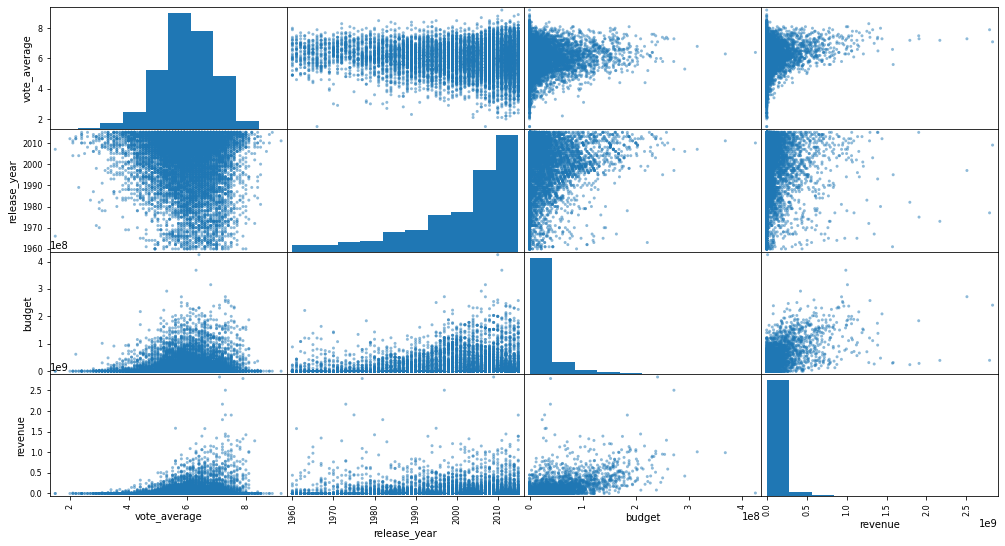

In [12]:
#Use scatter matrix to take an overview on the data and look for insights
pd.plotting.scatter_matrix(df_tmdp_movies_clean.iloc[:,1:],figsize=(17,9));

### Research Question 1 (Is there any relation between the released year and the budget, the revenue, number of released movies?)

In [13]:
#Create function "scatter figure" to avoid repeating the code
def scatter_figure(y, x,title, yl, xl):
    df_tmdp_movies_clean.plot(y=y, x=x, kind='scatter',figsize=(17,9),fontsize=(15));
    plt.title(title,fontsize=(15));
    plt.ylabel(yl,fontsize=(15));
    plt.xlabel(xl,fontsize=(15));

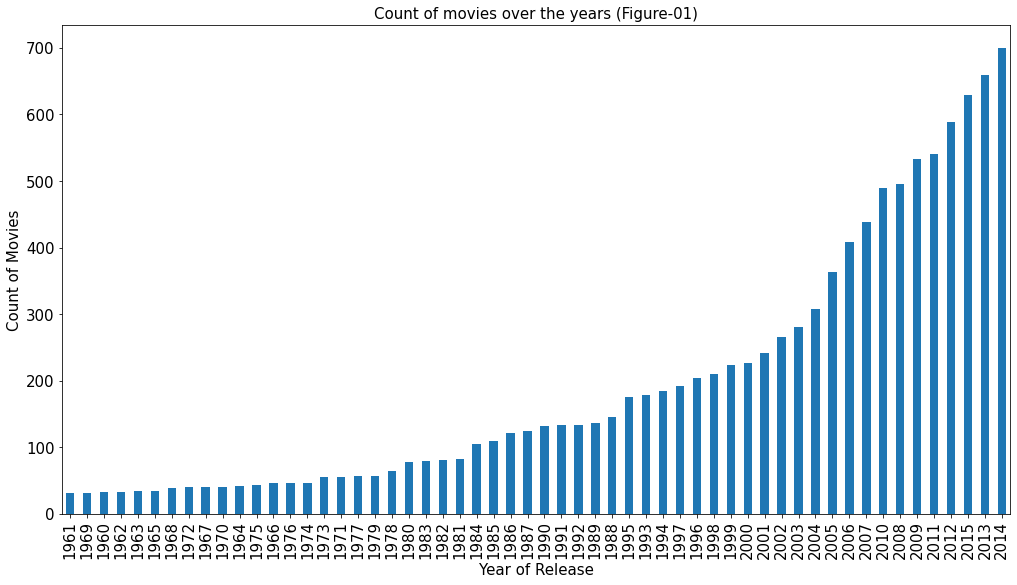

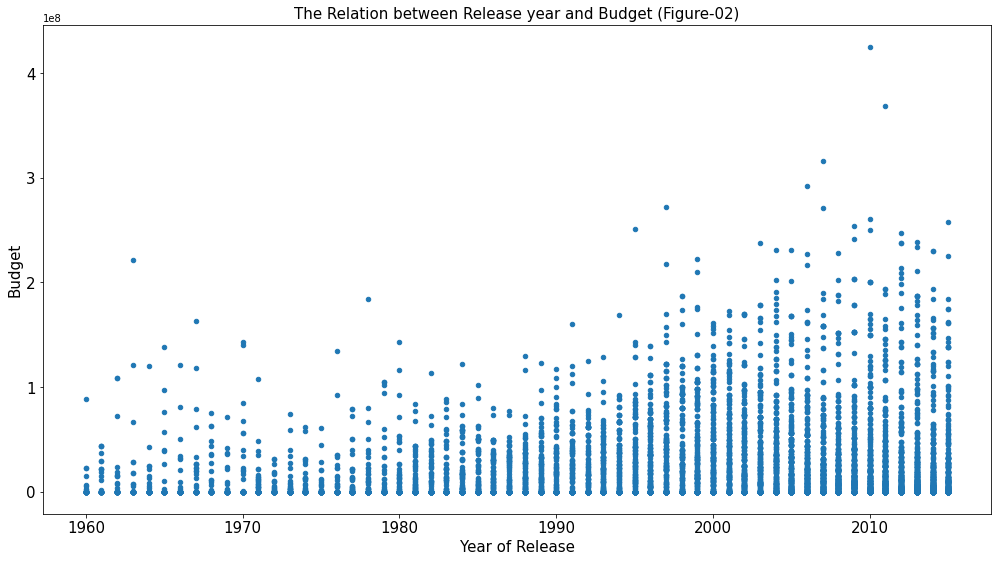

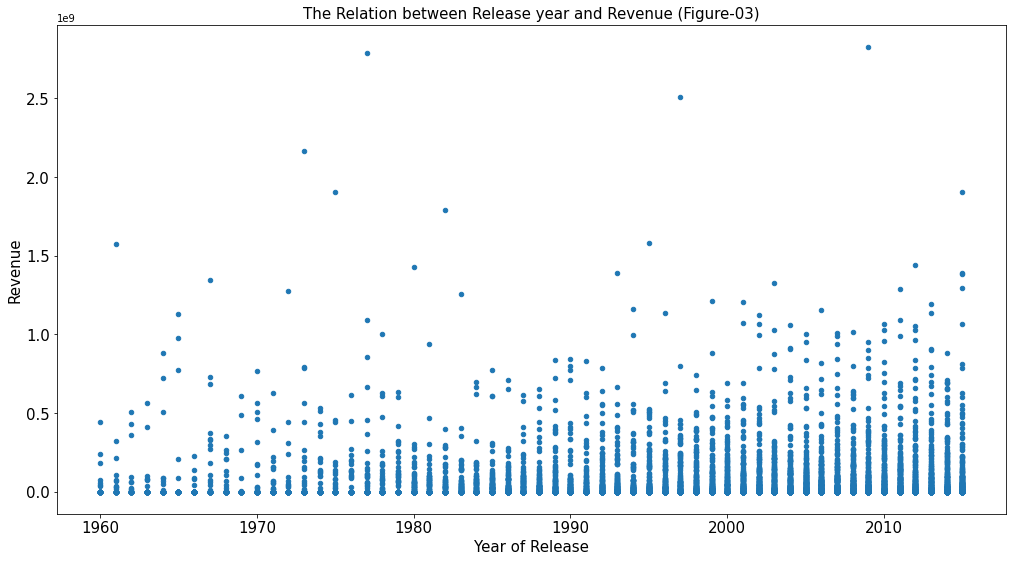

In [14]:
#(Figure-01)
df_tmdp_movies_clean['release_year'].value_counts(ascending=True).plot(kind='bar',figsize=(17,9),fontsize=(15));
plt.title('Count of movies over the years (Figure-01)',fontsize=(15));
plt.ylabel('Count of Movies',fontsize=(15));
plt.xlabel('Year of Release',fontsize=(15));

#(Figure-02)
scatter_figure('budget', 'release_year', 
               'The Relation between Release year and Budget (Figure-02)',
               'Budget', 'Year of Release')

#(Figure-03)
scatter_figure('revenue', 'release_year', 
               'The Relation between Release year and Revenue (Figure-03)',
               'Revenue', 'Year of Release')

> As Shown in the above figures there is correlation between released year and number of released movies, budget, revenue.
>
> Figure-01: Shows that count of movies release yearly increases over the years.
>
> Figure-02: Shows that the movies that released in recent years have higher budget than the movies that  released in earliest years.
>
> Figure-03: Shows that the movies that released in recent years have higher revenue than the movies that released in earliest years.

### Research Question 2 (Is there any relation between the vote average / budget  and the revenue ?)

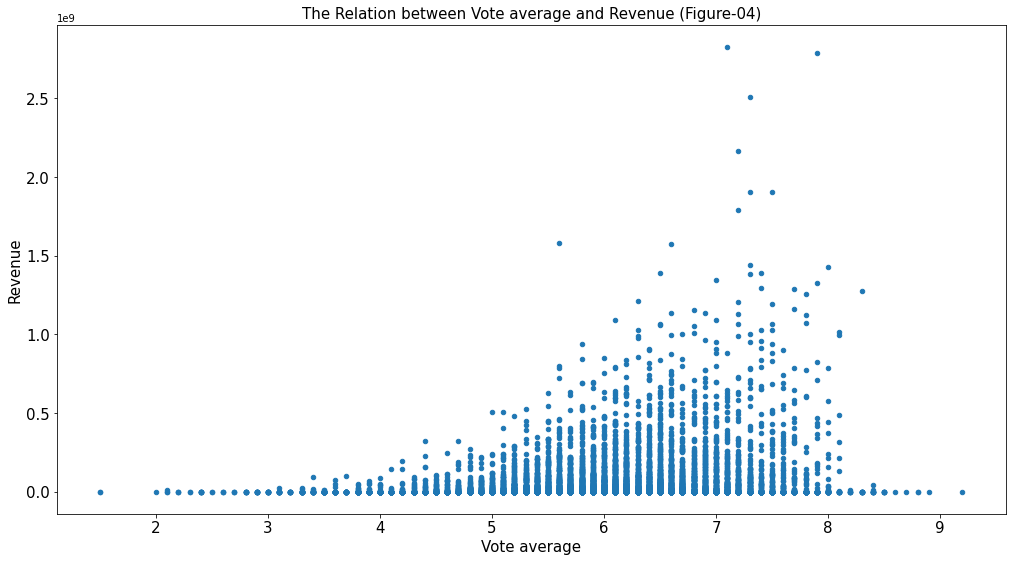

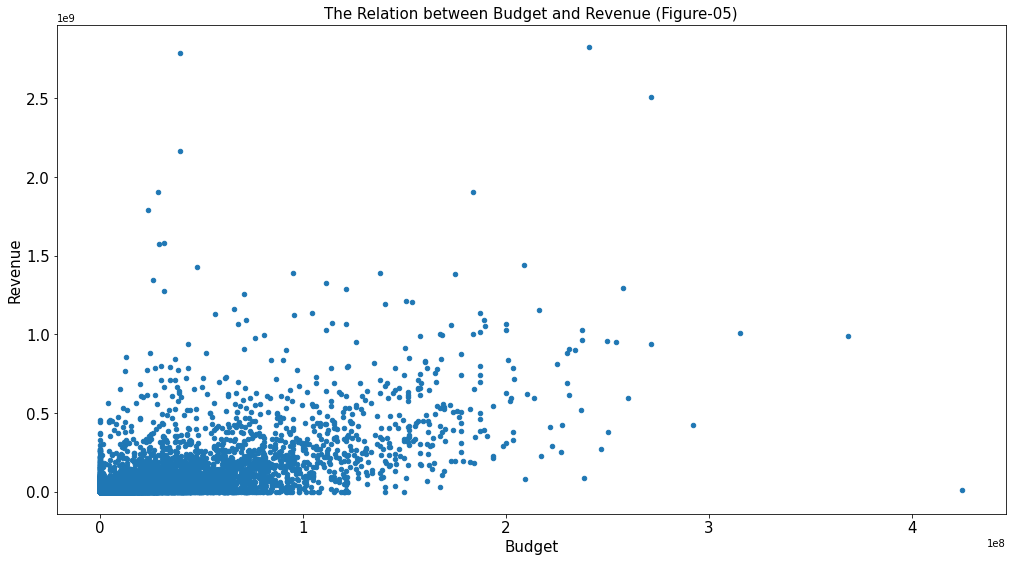

In [15]:
#(Figure-04)
scatter_figure('revenue', 'vote_average', 
               'The Relation between Vote average and Revenue (Figure-04)',
               'Revenue', 'Vote average')

#(Figure-05)
scatter_figure('revenue', 'budget', 
               'The Relation between Budget and Revenue (Figure-05)',
               'Revenue', 'Budget')

> Figure-04: Shows that the movies that have higher vote more likely achieve higher revenue.
>
> Figure-05: Shows that there is a weak correlation between budget and revenue of the movies.

<a id='conclusions'></a>
## Conclusions

> 1- Over the years the movies industry is growing in terms of number of movies released yearly, dedicated budget, and achieved revenue.
>
> 2- The movies that have higher vote more likely achieve higher revenue.
>
> 3- Increasing the budget is not the key factor to achieve high revenue.
>


> **limitations**: 
>
> The missing data is one of the limitations in the dataset , There are missing values of budget for 5696 movies and missing values of revenue for 6016 movies.